In [46]:
# import geopandas and matplotlib
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [2]:
# countries data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

**Print the top 5 rows of world dataframe.**

In [4]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


**Remove continents which have only one country in dataframe.**


In [7]:
# continents with only one country
world.groupby('continent').count()

,pop_est,name,iso_a3,gdp_md_est,geometry
continent,,,,,
Africa,51,51,51,51,51
Antarctica,1,1,1,1,1
Asia,47,47,47,47,47
Europe,39,39,39,39,39
North America,18,18,18,18,18
Oceania,7,7,7,7,7
Seven seas (open ocean),1,1,1,1,1
South America,13,13,13,13,13


In [8]:
# remove these continents
world2 = world[(world.continent != 'Antarctica') & (world.continent != 'Seven seas (open ocean)')]

In [9]:
world2.groupby('continent').count()

,pop_est,name,iso_a3,gdp_md_est,geometry
continent,,,,,
Africa,51,51,51,51,51
Asia,47,47,47,47,47
Europe,39,39,39,39,39
North America,18,18,18,18,18
Oceania,7,7,7,7,7
South America,13,13,13,13,13


**Create dataframe with top 3 most populated countries from each continent and store the result in dataframe with name 'world_filtered'.**


In [17]:
Africa = world2[world2['continent'] == 'Africa'].sort_values(['pop_est'],ascending=False).head(3)
Asia = world2[world2['continent'] == 'Asia'].sort_values(['pop_est'],ascending=False).head(3)
Europe = world2[world2['continent'] == 'Europe'].sort_values(['pop_est'],ascending=False).head(3)
N_America = world2[world2['continent'] == 'North America'].sort_values(['pop_est'],ascending=False).head(3)
S_America = world2[world2['continent'] == 'South America'].sort_values(['pop_est'],ascending=False).head(3)
Oceania = world2[world2['continent'] == 'Oceania'].sort_values(['pop_est'],ascending=False).head(3)

**Print the 'world_filtered' dataframe.**

In [23]:
world_filtered = pd.concat([Africa, Asia, Europe, N_America, S_America, Oceania], ignore_index=True)
world_filtered

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,190632261,Africa,Nigeria,NGA,1089000.0,"POLYGON ((2.692 6.259, 2.749 7.871, 2.724 8.50..."
1,105350020,Africa,Ethiopia,ETH,174700.0,"POLYGON ((47.789 8.003, 44.964 5.002, 43.661 4..."
2,97041072,Africa,Egypt,EGY,1105000.0,"POLYGON ((36.866 22.000, 32.900 22.000, 29.020..."
3,1379302771,Asia,China,CHN,21140000.0,"MULTIPOLYGON (((109.475 18.198, 108.655 18.508..."
4,1281935911,Asia,India,IND,8721000.0,"POLYGON ((97.327 28.262, 97.403 27.883, 97.052..."
5,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.000 -2.600, 141.017 -5.859..."
6,142257519,Europe,Russia,RUS,3745000.0,"MULTIPOLYGON (((178.725 71.099, 180.000 71.516..."
7,80594017,Europe,Germany,DEU,3979000.0,"POLYGON ((14.120 53.757, 14.353 53.248, 14.075..."
8,67106161,Europe,France,-99,2699000.0,"MULTIPOLYGON (((-51.658 4.156, -52.249 3.241, ..."
9,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.840 49.000, -120.000 49.0..."


-----------------
## Part I: Create a choropleth map of world:

   - First using **Geopandas**
       - Note: Geopandas may not work well on your computers, especially on Windows computers, it is advised to use Google Collab for this assignment. 
   - Second using **Plotly**
       - Note: Plotly may not work well on Jupyter Labs, it is advised to use Jupyter Notebooks or Google Collab for the plotly portion. 


> #### Notes
> * the colors of countries from 'world_filtered' are based on population
> * other countries can stay white

### GeoPandas

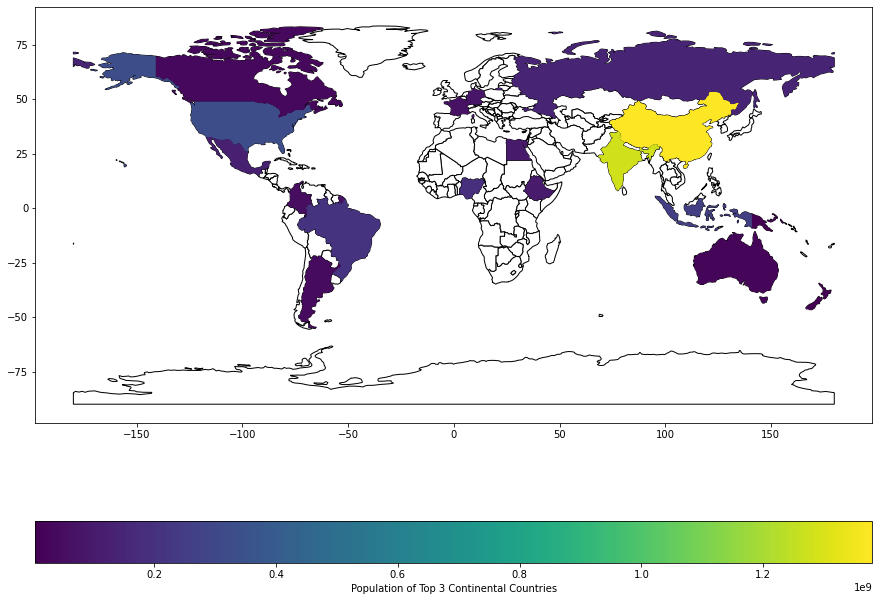

In [45]:
# create figure and axes
fig, ax = plt.subplots(figsize = (15,12))


# create map from world_filtered data-frame
base = world.plot(ax=ax, color='white', edgecolor='black')
world_filtered.plot(column = "pop_est", ax =base, legend = True,
                   legend_kwds = {'label': 'Population of Top 3 Continental Countries',
                                 'orientation':'horizontal'})


plt.show()

### Plotly

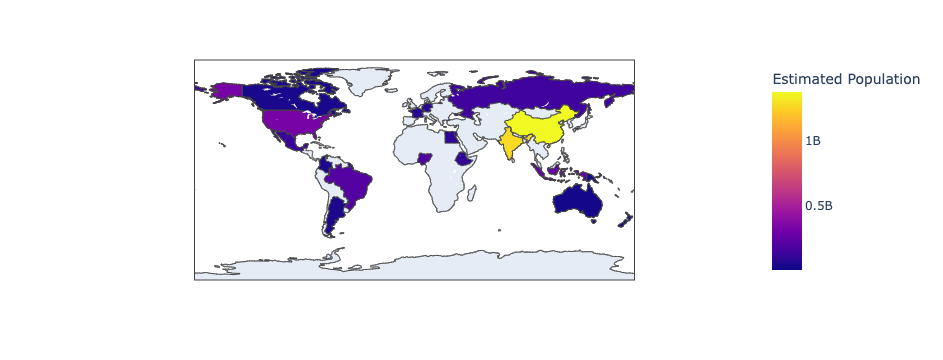

In [57]:
fig = px.choropleth(world_filtered, 
                    geojson=world_filtered.geometry,
                    locations = world_filtered.index,
                    color = 'pop_est', 
                   labels={'pop_est':'Estimated Population'})

fig.show()

-----------
## Part II: More Geopandas

In Geopandas:

* add New York, Berlin, Paris, Toronto, Calgary, Tokyo to the map you have created before
    * to get geometry of these cities use the function, **gpd.tools.geocode**(['New York', 'Berlin', 'Paris','Toronto', 'Calgary', 'Tokyo'])
    * if you do not have the geopy library instaled, install it with the following command **in the jupyter notebook cell** `!pip install geopy` 

In [108]:
#from geopy.geocoders import Nominatim
import geopy

In [111]:
city = gpd.tools.geocode(['New York', 'Berlin', 'Paris','Toronto', 'Calgary', 'Tokyo'], provider='photon')

In [100]:
geolocator = Nominatim(user_agent="myapp")
location = geolocator.geocode("Calgary, CA")

In [101]:
print(location.latitude, location.longitude)

51.0460954 -114.065465


In [102]:
data = {'name': ['New York', 'Berlin', 'Paris', 
                   'Toronto', 'Calgary', 'Tokyo'],
         'geometry': ['POINT (40.7127281 -74.0060152)',
                     'POINT (52.5170365 13.3888599)',
                     'POINT (48.8588897 2.3200410217200766)',
                     'POINT (43.6534817 -79.3839347)',
                     'POINT (51.0460954 -114.065465)',
                     'POINT (35.6828387 139.7594549)']}

cities = pd.DataFrame(data)

In [103]:
cities['geometry'] = gpd.GeoSeries.from_wkt(cities['geometry'])
cities2 = gpd.GeoDataFrame(cities, geometry='geometry')

In [104]:
cities2.dtypes

name          object
geometry    geometry
dtype: object

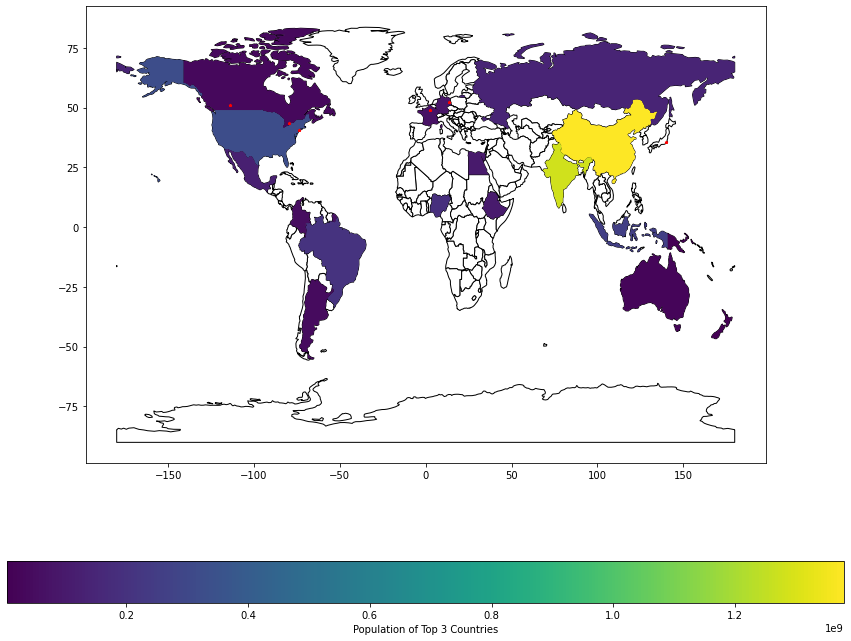

In [112]:
# create figure and axes
fig, ax = plt.subplots(figsize = (15,12))


# create map from world_filtered data-frame
base = world.plot(ax=ax, color='white', edgecolor='black')
world_filtered.plot(column = "pop_est", ax =base, legend = True,
                   legend_kwds = {'label': 'Population of Top 3 Countries',
                                 'orientation':'horizontal'})
city.plot(ax=base, marker='*', color = 'red', markersize=7)
plt.show()
